## 1.2 La Source

In [4]:
name = "PEREIRA SOUZA DIAS Isabelle"
' '.join(format(ord(x), 'b') for x in name)

'1010000 1000101 1010010 1000101 1001001 1010010 1000001 100000 1010011 1001111 1010101 1011010 1000001 100000 1000100 1001001 1000001 1010011 100000 1001001 1110011 1100001 1100010 1100101 1101100 1101100 1100101'

## 1.3 Modulation Vectorielle

Basés Vectorielles


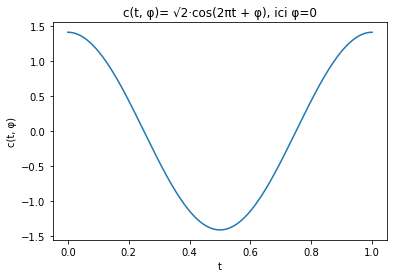

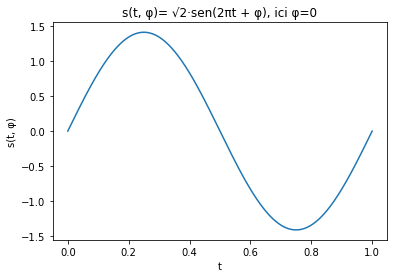


Modulation vectorialle:  0
Modulation: vk(t) = (e^(j·k·π/4))·c(t,0), k = 0,...,7


In [5]:
print('Basés Vectorielles')
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline   

t = np.linspace(0, 1.0000001, 1000)
plt.plot(t, np.sqrt(2) * np.cos(2*np.pi*t))
plt.title('c(t, φ)= √2·cos(2πt + φ), ici φ=0')
plt.xlabel('t')
plt.ylabel('c(t, φ)')
plt.show()

plt.plot(t, np.sqrt(2) * np.sin(2*np.pi*t))
plt.title('s(t, φ)= √2·sen(2πt + φ), ici φ=0')
plt.xlabel('t')
plt.ylabel('s(t, φ)')
plt.show()

print()
num = (ord('P')*ord('I')%4)
print('Modulation vectorialle: ', num)
print ('Modulation: vk(t) = (e^(j·k·π/4))·c(t,0), k = 0,...,7')

## 1.4 Génération des signaux

On travaille sur 3 bits, parce que on a 7 signaux et (7) en base 10 est (111) en base 2. 

Les trois premiers mots génére par mon nom sont: 101 000 010

    101 -> 5 en base 10
    000 -> 0 en base 10
    010 -> 2 en base 10
    
Les signaux temporels généres sont respectivement: v5(t), v0(t) et v

In [13]:
from array import array
s = []   
for i in range(0,8):
    s.append(np.exp(i*1j*np.pi/4))
    print(s[i])

c=(np.sqrt(2) * np.cos(2*np.pi*t))
v = []   
for i in range(0,8):
    v.append(s[i]*c)   

(1+0j)
(0.7071067811865476+0.7071067811865475j)
(6.123233995736766e-17+1j)
(-0.7071067811865475+0.7071067811865476j)
(-1+1.2246467991473532e-16j)
(-0.7071067811865477-0.7071067811865475j)
(-1.8369701987210297e-16-1j)
(0.7071067811865475-0.7071067811865477j)


Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k = 5


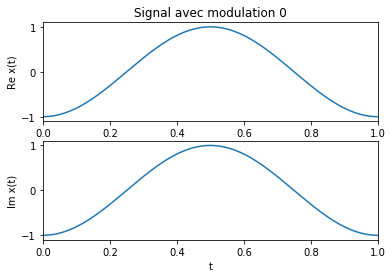

Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k = 0


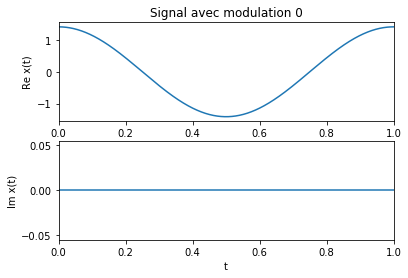

Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k = 2


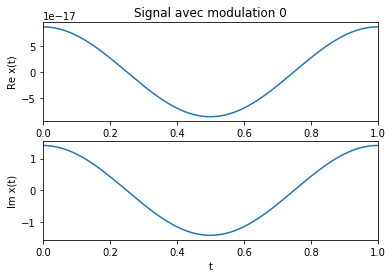

In [7]:
#Sinal 101, 000 et 010 avec modulation 0
for i in [5,0,2]:
    print('Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k =',i)
    plt.subplot(2,1,1)
    plt.plot(t, (s[i]*c).real )
    plt.xlabel('t')
    plt.ylabel('Re x(t)')
    plt.title('Signal avec modulation 0')
    plt.xlim([0, 1])
    plt.subplot(2,1,2)
    plt.plot(t, (s[i]*c).imag )
    plt.xlabel('t')
    plt.ylabel('Im x(t)')
    plt.xlim([0, 1])
    plt.show()


#### Diagramme de Constellation 

Des bases de la constellation sont c(t,0) et s(t,0). Nous pouvons prédire que l'axe s(t,0) contiendra toutes les valeurs à s(t,0)= 0, car notre signal de modulation ne dépend que de c(t,0). En notre modulation, le point dans l'axe c'est en fait un nombre complexe, ça veut dire que il y a un axe Imaginaire perpendiculaire à c(t,0) et s(t,0). C'est-à-dire notre diagramme de constellation est 3D.

On peut faire la constelation en 2D de la partie imaginnaire et la base c(t,0) pour trouver une constellation circulaire, mais si on trace la constellation sur les bases c(t,0) et s(t,0) on va trouver seulment le partie Réel de le notre nombre complex.

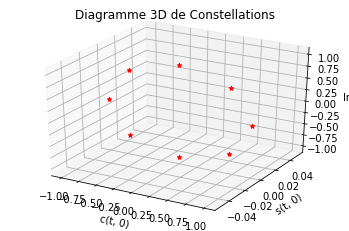

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

constellation3D = plt.figure()
ax = plt.axes(projection='3d')
for i in range(0,8):
    si=np.exp(i*1j*np.pi/4)
    ax.scatter(si.real, 0, si.imag, c='r', marker='*')

ax.set_title('Diagramme 3D de Constellations')
ax.set_xlabel('c(t, 0)')
ax.set_ylabel('s(t, 0)')
ax.set_zlabel('Im')
plt.show()

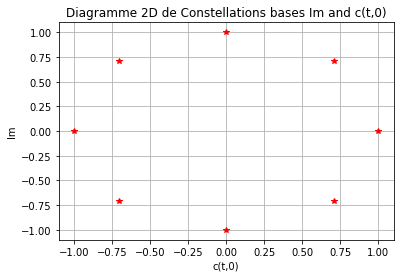

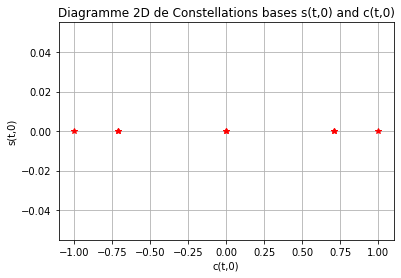

In [10]:
constellation2D = plt.figure() #constelattion avec la partie Im e base c(t,0)

for i in range(0,8):
    si=np.exp(i*1j*np.pi/4)
    plt.plot(si.real, si.imag, c='r', marker='*')

plt.grid(True)
plt.title('Diagramme 2D de Constellations bases Im and c(t,0)')
plt.ylabel('Im')
plt.xlabel('c(t,0)')
plt.show()

constellation2D = plt.figure() #constelattion avec s(t,0) e base c(t,0)

for i in range(0,8):
    si=np.exp(i*1j*np.pi/4)
    plt.plot(si, 0, c='r', marker='*')

plt.grid(True)
plt.title('Diagramme 2D de Constellations bases s(t,0) and c(t,0)')
plt.ylabel('s(t,0)')
plt.xlabel('c(t,0)')
plt.show()

## 1.5 Puissance Moyenne

Théorie: pour calculer la puissance moyenne on calculé la valeur absolue du signal au carré, fait la integral et divisé par la période. Dans notre modulation nous n'avons qu'un seul signal sinusoïdal multipliant un nombre complexe. Le nombre complex ne dépend pas du temps, donc, ce n'est pas dans la integral, et pour la partie sinusoïdal on aura seulment la amplitude carré divisé par 2, car la integral de cos(2πt) -> 1 dans la période [0,1], alors Ps= A^2/2. Comme A=√2, alors Ps=1. À la fin Pm= |nbr complex|^2*Ps = |nbr complex|^2.

In [14]:
#Théoriquement
Pm5=abs(s[5])**2
Pm0=abs(s[0])**2
Pm2=abs(s[2])**2

#Sur python
import scipy.integrate
Esig5 = scipy.integrate.simps(np.abs(v[5])**2, t)
Esig0 = scipy.integrate.simps(np.abs(v[0])**2, t)
Esig2 = scipy.integrate.simps(np.abs(v[2])**2, t)
    
print('Puissance moyenne utilisée par le mot 101: Théoriquement Pm5=', Pm5, 'et sur python =', Esig5)
print('Puissance moyenne utilisée par le mot 000: Théoriquement Pm0=', Pm0, 'et sur python =', Esig0)
print('Puissance moyenne utilisée par le mot 010: Théoriquement Pm2=', Pm2, 'et sur python =', Esig2)


Puissance moyenne utilisée par le mot 101: Théoriquement Pm5= 1.0 et sur python = 1.0000001868011403
Puissance moyenne utilisée par le mot 000: Théoriquement Pm0= 1.0 et sur python = 1.0000001868011401
Puissance moyenne utilisée par le mot 010: Théoriquement Pm2= 1.0 et sur python = 1.0000001868011401


## 1.6 Addition du bruit blanc
Sur la partie réelle et sur la partie imaginaire, on a ajuté un bruit blanc, dans un premier temps, en utilisant une énergie par unité de temps 100 fois plus faible que l’énergie moyenne d’un mot, et ensuite en utilisant une énergie 2 fois plus faible que l’énergie moyenne d’un mot.

Pour ajouter le bruit 100 fois plus faible, on fait 1/100 * bruit. Et pour ajouter le bruit 2 fois plus daible, on ajouté le bruit 1/2 * bruit à le signal.

In [20]:
bruit = np.random.normal(0,1,t.shape)

Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k = 5


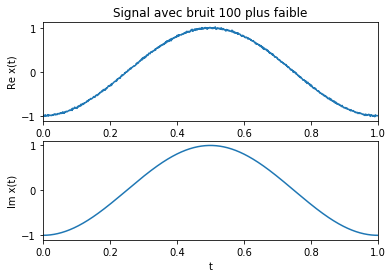

Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k = 0


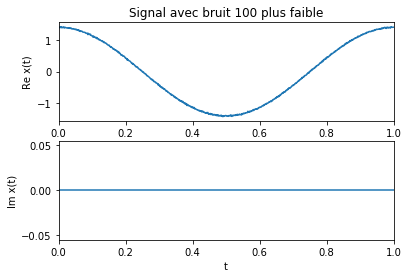

Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k = 2


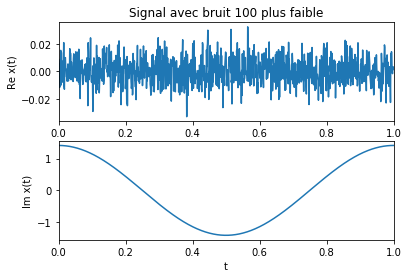

In [21]:
#Sinaux avec modulation 0 et bruit 100 fois plus faible
for i in [5,0,2]:
    print('Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k =',i)
    plt.subplot(2,1,1)
    plt.plot(t, (s[i]*c+0.01*bruit).real )
    plt.xlabel('t')
    plt.ylabel('Re x(t)')
    plt.title('Signal avec bruit 100 plus faible')
    plt.xlim([0, 1])
    plt.subplot(2,1,2)
    plt.plot(t, (s[i]*c+0.01*bruit).imag )
    plt.xlabel('t')
    plt.ylabel('Im x(t)')
    plt.xlim([0, 1])
    plt.show()

Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k = 5


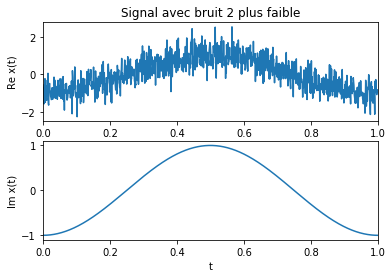

Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k = 0


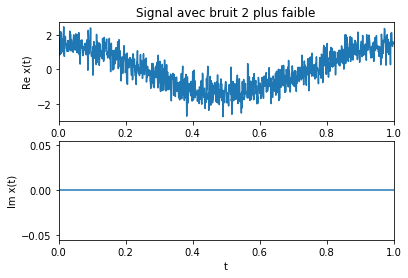

Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k = 2


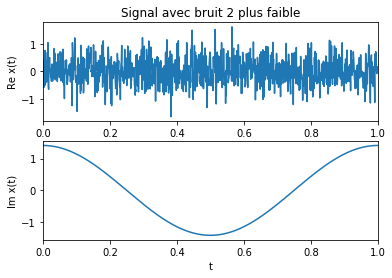

In [44]:
#Sinaux avec modulation 0 et bruit 2 fois plus faible
for i in [5,0,2]:
    print('Signal de  $vk(t)=e^{j5 \pi/4 t}$·c(t, φ), avec k =',i)
    plt.subplot(2,1,1)
    plt.plot(t, (s[i]*c+0.5*bruit).real )
    plt.xlabel('t')
    plt.ylabel('Re x(t)')
    plt.title('Signal avec bruit 2 plus faible')
    plt.xlim([0, 1])
    plt.subplot(2,1,2)
    plt.plot(t, (s[i]*c+0.5*bruit).imag )
    plt.xlabel('t')
    plt.ylabel('Im x(t)')
    plt.xlim([0, 1])
    plt.show()

## 1.7 Tracé

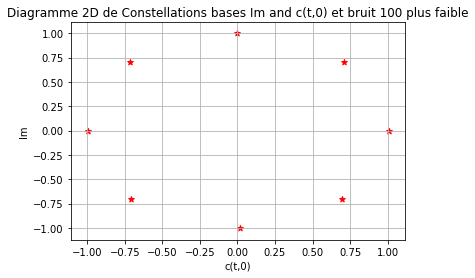

In [38]:
constellation2D = plt.figure() #constelattion avec la partie Im e base c(t,0) et bruit 100

for i in range(0,8):
    plt.scatter((s[i]+0.01*bruit[i]).real, (s[i]+0.01*bruit[i]).imag, c='r', marker='*')

plt.grid(True)
plt.title('Diagramme 2D de Constellations bases Im and c(t,0) et bruit 100 plus faible')
plt.ylabel('Im')
plt.xlabel('c(t,0)')
plt.show()

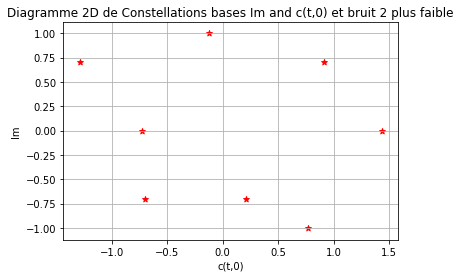

In [40]:
constellation2D = plt.figure() #constelattion avec la partie Im e base c(t,0) et bruit 100

for i in range(0,8):
    plt.scatter((s[i]+0.5*bruit[i]).real, (s[i]+0.5*bruit[i]).imag, c='r', marker='*')

plt.grid(True)
plt.title('Diagramme 2D de Constellations bases Im and c(t,0) et bruit 2 plus faible')
plt.ylabel('Im')
plt.xlabel('c(t,0)')
plt.show()

## 1.8 Récepteur
Théorie: le produit scalaire entre g(x) et f(x) dans un period [1,0] est la intergral de f(x)•g(x) de 0 à 1.

In [41]:
#TECHNIQUE
#produit scalaire pour trouver la base
cc = lambda t: c #on n'a pas besoin de la base s parce que dans notre modulation c'est toujours zero.
print(s[2])
prod = scipy.integrate.simps(cc(t)*v[2], t) #integral pour trouver le produit scalaire entre deux fonctions
print(prod)
angle=np.angle(prod)  #angle pour localiser le point
if angle < 0 :
    angle=angle+2*np.pi #changer l'intervalle de [-180,180] to [0,360]
k= angle*4/np.pi #trouver le valeur de k
print(round(k))
'{0:03b}'.format(int(round(k))) #convertier le entier à 3 bits

(6.123233995736766e-17+1j)
(6.123235139563858e-17+1.0000001868011401j)
2.0


'010'

In [47]:
#produit scalaire pour trouver la base
cc = lambda t: c #on n'a pas besoin de la base s parce que dans notre modulation c'est toujours zero.
print('Les signaux originaux sont: 0, 2 et 5. Signaux qui sont reçu avec les deux types de bruit: ')
for i in {0,2,5}:
    br1i=v[i]+0.01*bruit
    br2i=v[i]+0.5*bruit
    prod1 = scipy.integrate.simps(cc(t)*br1i, t)
    angle1=np.angle(prod1)
    if angle1 < 0 :
        angle1=angle1+2*np.pi
    k1= angle1*4/np.pi #trouver le valeur de k
    print('{0:03b}'.format(int(round(k1))))
    prod2 = scipy.integrate.simps(cc(t)*br2i, t)
    angle2=np.angle(prod2)
    if angle2 < 0 :
        angle2=angle2+2*np.pi
    k2= angle2*4/np.pi #trouver le valeur de k
    print('{0:03b}'.format(int(round(k2))))

Les signaux originaux sont: 0, 2 et 5. Signaux qui sont reçu avec les deux types de bruit: 
000
000
010
010
101
101


## 1.9 Taux d'erreur de mots et de bits
Pour obtenir une source plus longue, on va faire un source random avec 1000 mots, ajouter 3 bruits differents et vérifier le nombre de mots erronés. À la fin on aura vérifié 3000 mots. 

In [36]:
#Taux d'erreur de mots
num= np.random.randint(7, size=(1, 1000)) #source plus longue, random avec 1000 mots
n=0
print(num)
for k in range(0,1000):
    i=num[0][k]
    br1i=v[i]+0.01*bruit  #bruit 100 fois plus faible
    br2i=v[i]+0.05*bruit  #bruit 2 fois plus faible
    br3i=v[i]+np.random.normal(0,15,t.shape) #bruit 3
    
    prod1 = scipy.integrate.simps(cc(t)*br1i, t)
    angle1=np.angle(prod1)
    if angle1 < 0 :
        angle1=angle1+2*np.pi
    y1= angle1*4/np.pi #trouver le valeur de k
    if round(y1)!= i:
        n=n+1
        
    prod2 = scipy.integrate.simps(cc(t)*br2i, t)
    angle2=np.angle(prod2)
    if angle2 < 0 :
        angle2=angle2+2*np.pi
    y2= angle2*4/np.pi #trouver le valeur de k
    if round(y2)!= i:
        n=n+1
        
    prod3 = scipy.integrate.simps(cc(t)*br3i, t)
    angle3=np.angle(prod3)
    if angle3 < 0 :
        angle3=angle3+2*np.pi
    y3= angle3*4/np.pi #trouver le valeur de k
    if round(y3)!= i:
        n=n+1
print('Nombre de mots erronés trouvé: ',n, ', nombre de mots envoyés: 3000. Taux d\'erreur de mots: ', n/3000) 

[[3 5 6 1 1 4 3 4 3 0 4 2 1 6 6 5 3 5 6 0 4 2 3 2 0 3 3 5 0 2 1 3 4 6 0 1
  6 5 6 4 0 5 2 2 6 4 0 0 3 4 6 4 5 1 0 2 2 0 1 3 0 0 3 2 5 1 0 4 0 2 3 6
  0 2 2 3 1 2 0 4 2 5 5 2 0 5 0 0 3 3 2 6 1 5 4 5 1 5 3 6 5 5 1 5 6 3 6 1
  6 2 0 3 2 5 3 2 2 2 6 5 0 3 6 0 2 6 2 4 4 5 3 5 2 5 2 1 1 1 1 6 4 5 6 1
  3 1 4 2 3 1 1 2 5 0 2 2 5 4 1 4 3 2 2 0 1 1 3 6 0 6 4 3 6 2 0 3 6 1 2 5
  1 1 3 3 4 2 6 0 6 0 1 0 1 2 1 2 6 4 3 5 1 5 0 2 4 5 4 6 4 4 6 5 6 6 1 5
  2 2 3 3 6 3 0 0 6 4 5 6 4 5 2 1 4 2 1 0 4 6 5 0 4 5 5 5 0 1 4 3 3 4 4 6
  2 3 3 4 2 1 6 5 4 5 4 4 3 1 6 1 6 3 2 2 2 5 6 2 3 3 6 2 4 2 2 2 0 0 4 2
  6 3 4 5 1 2 4 1 0 5 1 6 2 1 6 2 5 1 0 2 1 4 4 2 3 5 3 5 3 3 6 5 4 5 0 1
  5 3 2 5 0 2 2 0 5 4 6 4 5 6 0 6 6 4 0 1 6 4 6 4 1 2 3 0 6 1 4 6 6 5 2 6
  6 5 2 1 4 2 0 0 1 4 0 2 3 2 2 2 6 1 3 5 2 4 4 0 3 1 3 6 5 2 0 1 3 5 2 0
  2 6 5 2 6 6 3 5 0 0 2 3 1 2 0 0 1 1 2 1 5 2 5 6 0 1 4 0 3 1 6 1 5 5 4 4
  3 4 2 5 3 4 2 5 4 6 6 3 4 3 2 6 6 5 5 4 4 4 4 2 6 0 4 5 3 4 4 2 0 2 4 4
  2 3 3 0 6 5 2 1 3 5 5 4 2 4 1 4 1 0 